In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\ashwi\Downloads\Social_Media_Advertising.csv')

print(df.head())
df.describe()

   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0             0.15          $500.00  5.790000    Las Vegas  Spanish     500   
1             0.01          $500.00  7.210000  Los Angeles   French     500   
2             0.08          $500.00  0.430000       Austin  Spanish     500   
3             0.03          $500.00  0.909824        Miami  Spanish     293   
4             0.13          $500.00  1.422828       Austin   French     293   

   Impressions  Engagement_Score Customer_Segment        Date         Company  


,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,550444.804487,0.080009,3.177691,18153.670370,56034.236387,4.369217
std,260252.586037,0.040563,2.461200,11027.023294,32583.136334,3.156492
min,100001.000000,0.010000,0.000000,293.000000,1937.000000,1.000000
25%,325003.500000,0.050000,0.930000,8821.000000,28362.000000,1.000000
50%,551164.500000,0.080000,2.670000,17230.000000,54098.000000,4.000000
75%,776284.500000,0.110000,5.330000,26808.000000,80925.250000,7.000000
max,999998.000000,0.150000,8.000000,40000.000000,120000.000000,10.000000


In [7]:
df.isnull().sum()

Campaign_ID         0
Target_Audience     0
Campaign_Goal       0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
Company             0
Gender              0
Age_Group           0
dtype: int64

In [34]:
import pandas as pd

# Assuming your DataFrame is named df and 'Target_Audience' is in the format 'Gender Age-Group'
# For example, 'Men 35-44' or 'Women 45-60'

# 1. Split 'Target_Audience' into 'Gender' and 'Age_Group'
df[['Gender', 'Age_Group']] = df['Target_Audience'].str.split(' ', expand=True)
df['Age_Group'] = df['Age_Group'].replace('Ages', '0-100')

# 2. Drop the original 'Target_Audience' column if no longer needed
#df.drop(columns=['Target_Audience'], inplace=True)

# Display the updated DataFrame to check the new columns
print(df.head())

   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0             0.15          $500.00  5.790000    Las Vegas  Spanish     500   
1             0.01          $500.00  7.210000  Los Angeles   French     500   
2             0.08          $500.00  0.430000       Austin  Spanish     500   
3             0.03          $500.00  0.909824        Miami  Spanish     293   
4             0.13          $500.00  1.422828       Austin   French     293   

   Impressions  Engagement_Score Customer_Segment        Date         Company  \

In [18]:
# Calculate average conversion rate by gender
conversion_by_gender = df.groupby('Gender')['Conversion_Rate'].mean()

# Calculate average conversion rate by age group
conversion_by_age_group = df.groupby('Age_Group')['Conversion_Rate'].mean()

# Calculate average conversion rate by customer segment
conversion_by_segment = df.groupby('Customer_Segment')['Conversion_Rate'].mean()

print("Conversion Rate by Gender:\n", conversion_by_gender)
print("Conversion Rate by Age Group:\n", conversion_by_age_group)
print("Conversion Rate by Customer Segment:\n", conversion_by_segment)

Conversion Rate by Gender:
 Gender
All      0.080197
Men      0.080040
Women    0.079932
Name: Conversion_Rate, dtype: float64
Conversion Rate by Age Group:
 Age_Group
0-100    0.080197
18-24    0.080105
25-34    0.079825
35-44    0.080057
45-60    0.079957
Name: Conversion_Rate, dtype: float64
Conversion Rate by Customer Segment:
 Customer_Segment
Fashion       0.080100
Food          0.079913
Health        0.079935
Home          0.080045
Technology    0.080054
Name: Conversion_Rate, dtype: float64


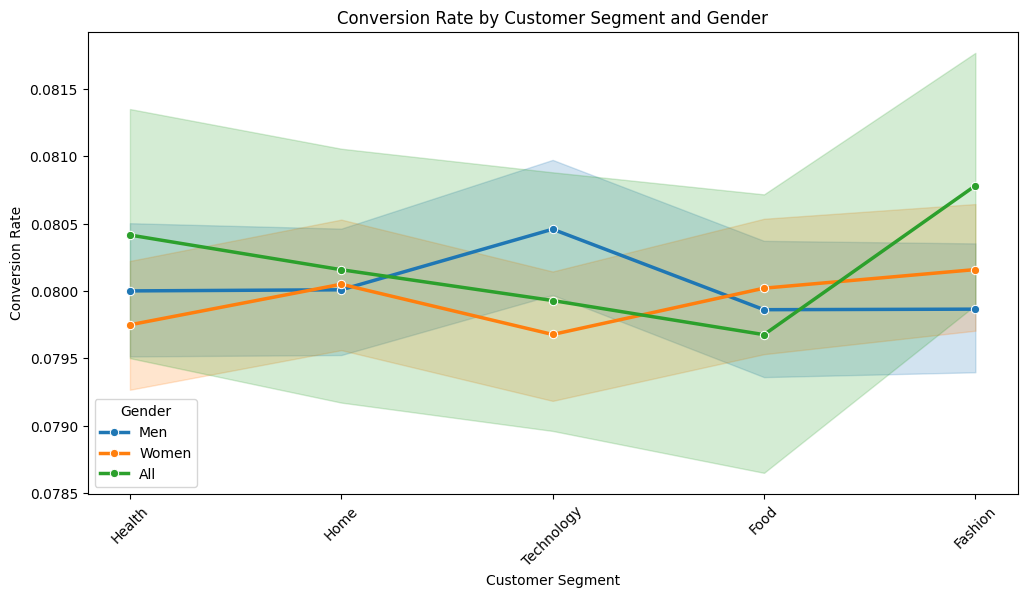

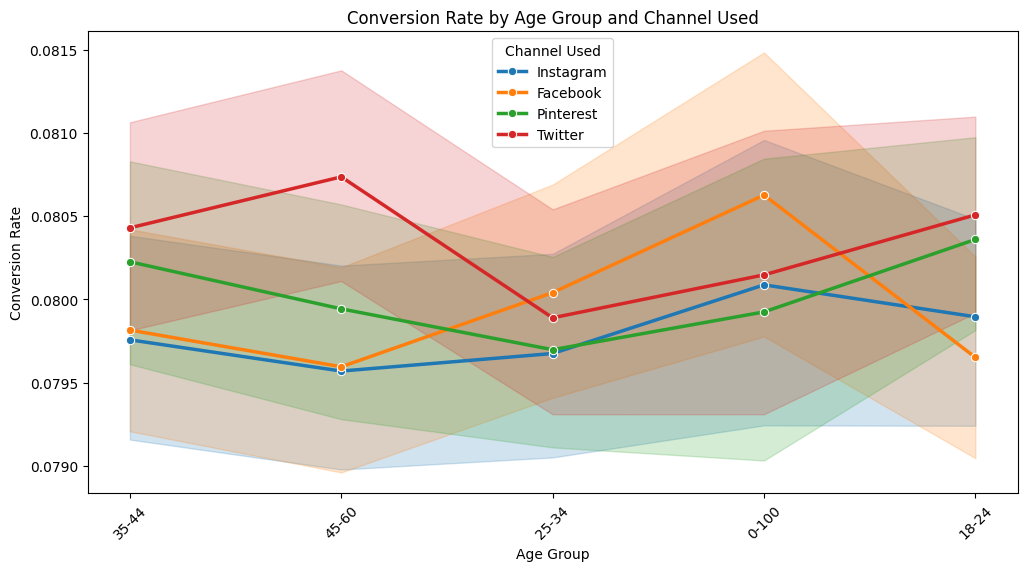

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Customer_Segment', y='Conversion_Rate', hue='Gender', marker='o', linewidth=2.5)
plt.title("Conversion Rate by Customer Segment and Gender")
plt.xlabel("Customer Segment")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age_Group', y='Conversion_Rate', hue='Channel_Used', marker='o', linewidth=2.5)
plt.title("Conversion Rate by Age Group and Channel Used")
plt.xlabel("Age Group")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.legend(title="Channel Used")
plt.show()


C:\Users\ashwi\AppData\Local\Temp\ipykernel_144560\170142786.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_after_click = df.groupby('Age_Group').apply(lambda x: (x['Conversion_Rate'] * x['Clicks']).sum() / x['Clicks'].sum())


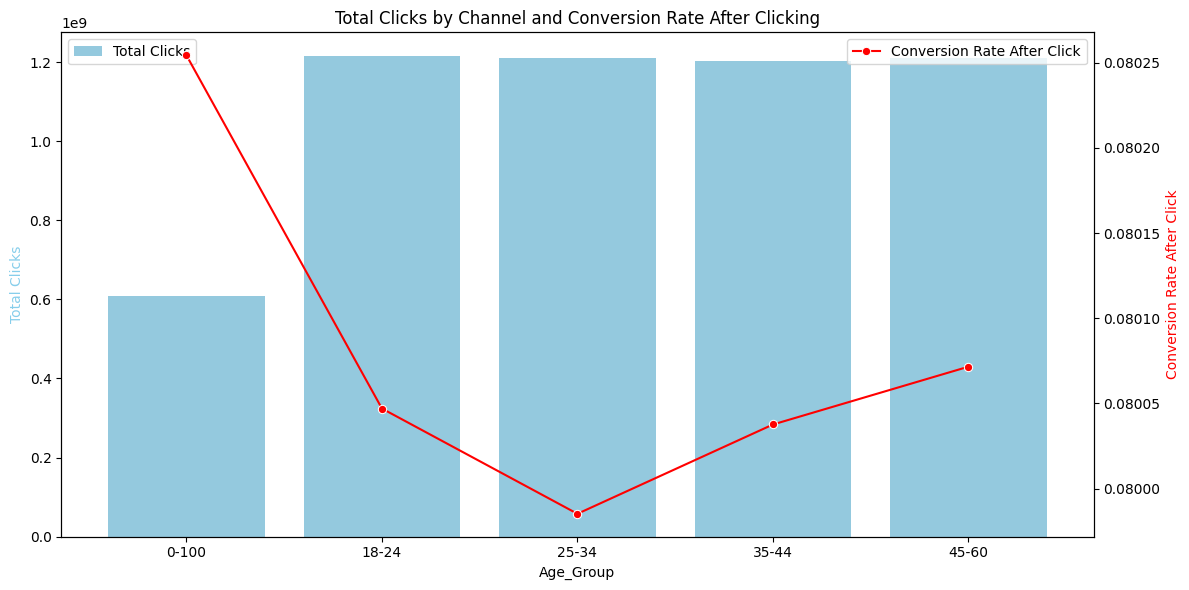

In [137]:

# Calculate total clicks and conversion after clicking for each channel
total_clicks = df.groupby('Age_Group')['Clicks'].sum()
conversion_after_click = df.groupby('Age_Group').apply(lambda x: (x['Conversion_Rate'] * x['Clicks']).sum() / x['Clicks'].sum())

# Combine the two Series into a new DataFrame for easier plotting
plot_df = pd.DataFrame({
    'Total Clicks': total_clicks,
    'Conversion Rate After Click': conversion_after_click
}).reset_index()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Clicks
sns.barplot(data=plot_df, x='Age_Group', y='Total Clicks', color='skyblue', ax=ax1, label="Total Clicks")

# Create a second y-axis for the Conversion Rate After Click
ax2 = ax1.twinx()
sns.lineplot(data=plot_df, x='Age_Group', y='Conversion Rate After Click', marker='o', color='red', ax=ax2, label="Conversion Rate After Click")

# Labels and Titles
ax1.set_xlabel("Age_Group")
ax1.set_ylabel("Total Clicks", color='skyblue')
ax2.set_ylabel("Conversion Rate After Click", color='red')
plt.title("Total Clicks by Channel and Conversion Rate After Clicking")
fig.tight_layout()
plt.show()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_144560\1428293238.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_after_click = df_filtered.groupby('Gender').apply(lambda x: (x['Conversion_Rate'] * x['Clicks']).sum() / x['Clicks'].sum())


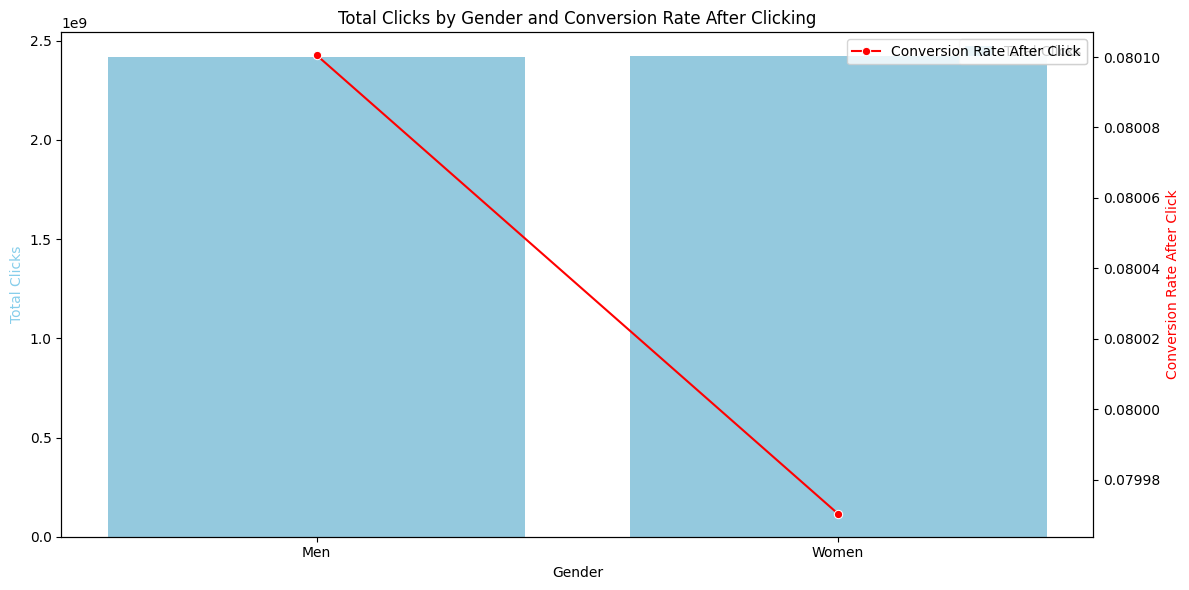

In [139]:
# Exclude rows where Age_Group is "0-100"
df_filtered = df[df['Age_Group'] != 'All']

# Calculate total clicks and conversion rate after clicking for each age group
total_clicks = df_filtered.groupby('Age_Group')['Clicks'].sum()
conversion_after_click = df_filtered.groupby('Age_Group').apply(lambda x: (x['Conversion_Rate'] * x['Clicks']).sum() / x['Clicks'].sum())

# Combine the two Series into a new DataFrame for easier plotting
plot_df = pd.DataFrame({
    'Total Clicks': total_clicks,
    'Conversion Rate After Click': conversion_after_click
}).reset_index()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Clicks
sns.barplot(data=plot_df, x='Age_Group', y='Total Clicks', color='skyblue', ax=ax1, label="Total Clicks")

# Create a second y-axis for the Conversion Rate After Click
ax2 = ax1.twinx()
sns.lineplot(data=plot_df, x='Age_Group', y='Conversion Rate After Click', marker='o', color='red', ax=ax2, label="Conversion Rate After Click")

# Labels and Titles
ax1.set_xlabel("Age_Group")
ax1.set_ylabel("Total Clicks", color='skyblue')
ax2.set_ylabel("Conversion Rate After Click", color='red')
plt.title("Total Clicks by Gender and Conversion Rate After Clicking")
fig.tight_layout()
plt.show()

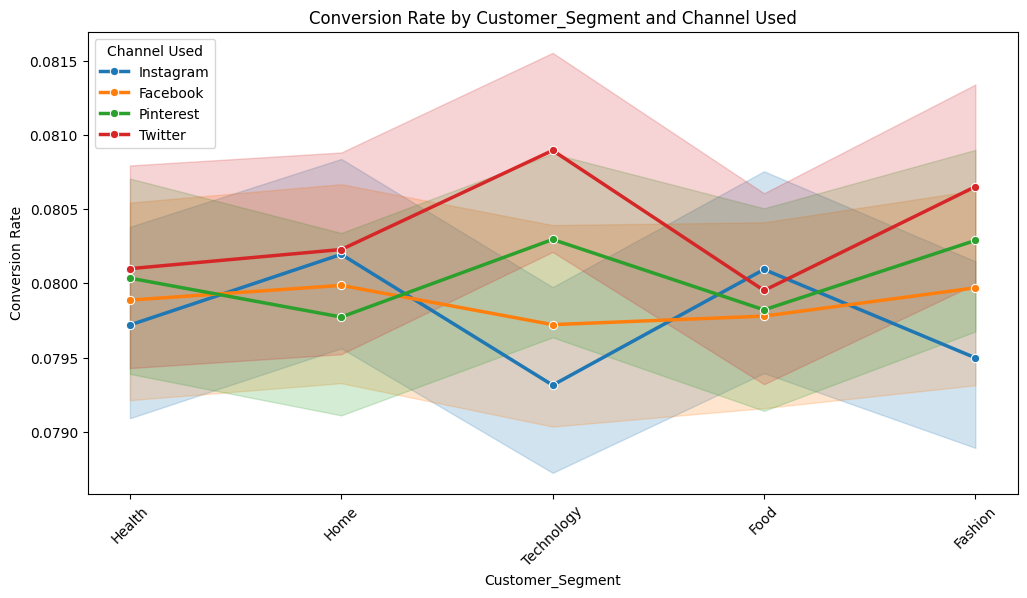

In [111]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Customer_Segment', y='Conversion_Rate', hue='Channel_Used', marker='o', linewidth=2.5)
plt.title("Conversion Rate by Customer_Segment and Channel Used")
plt.xlabel("Customer_Segment")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.legend(title="Channel Used")
plt.show()


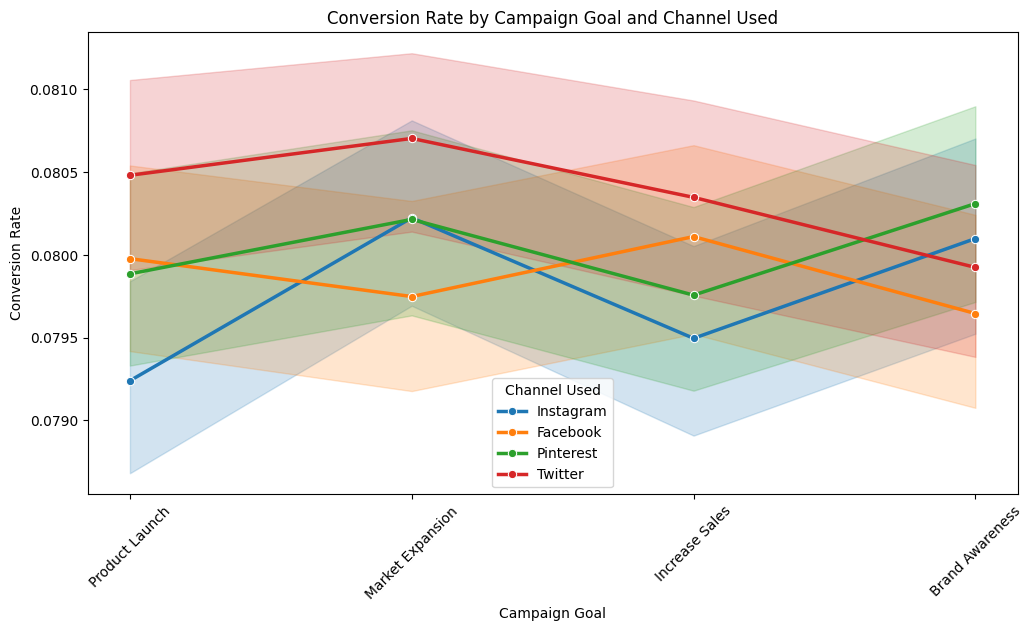

In [119]:
# Conversion Rate by Campaign Goal and Channel Used
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Campaign_Goal', y='Conversion_Rate', hue='Channel_Used', marker='o', linewidth=2.5)
plt.title("Conversion Rate by Campaign Goal and Channel Used")
plt.xlabel("Campaign Goal")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.legend(title="Channel Used")
plt.show()

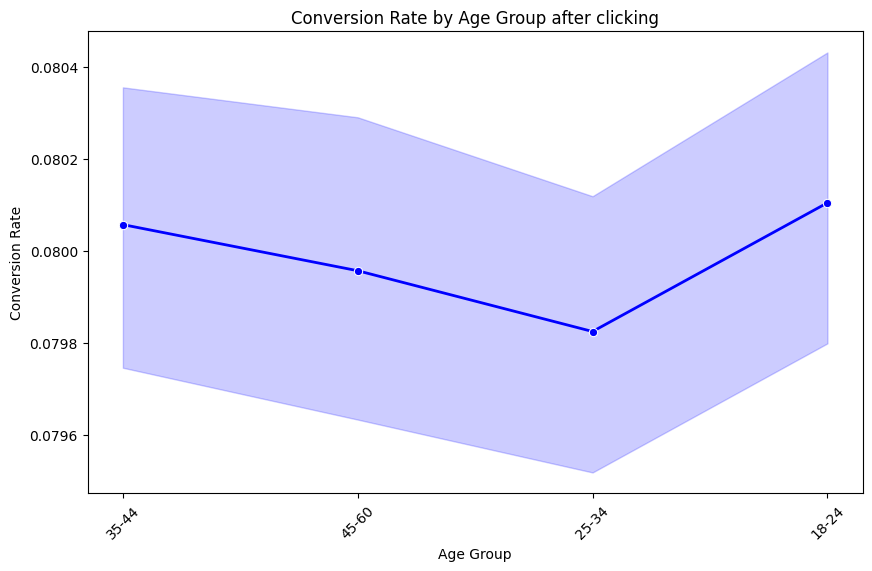

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the "0-100" age group
filtered_df = df[df['Age_Group'] != '0-100']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='Age_Group', y='Conversion_Rate', marker='o', color='b', linewidth=2)
plt.title("Conversion Rate by Age Group after clicking")
plt.xlabel("Age Group")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

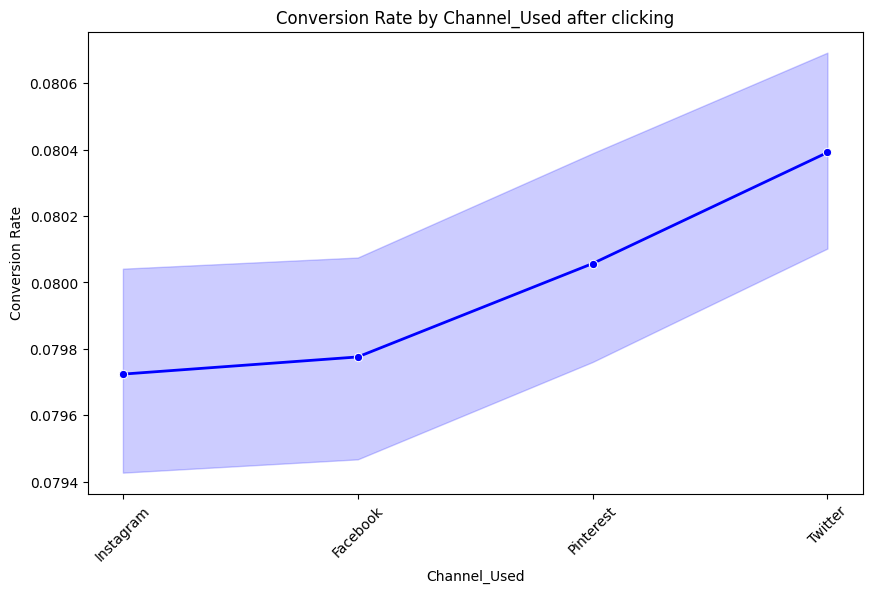

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the "0-100" age group
filtered_df = df[df['Age_Group'] != '0-100']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='Channel_Used', y='Conversion_Rate', marker='o', color='b', linewidth=2)
plt.title("Conversion Rate by Channel_Used after clicking")
plt.xlabel("Channel_Used")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

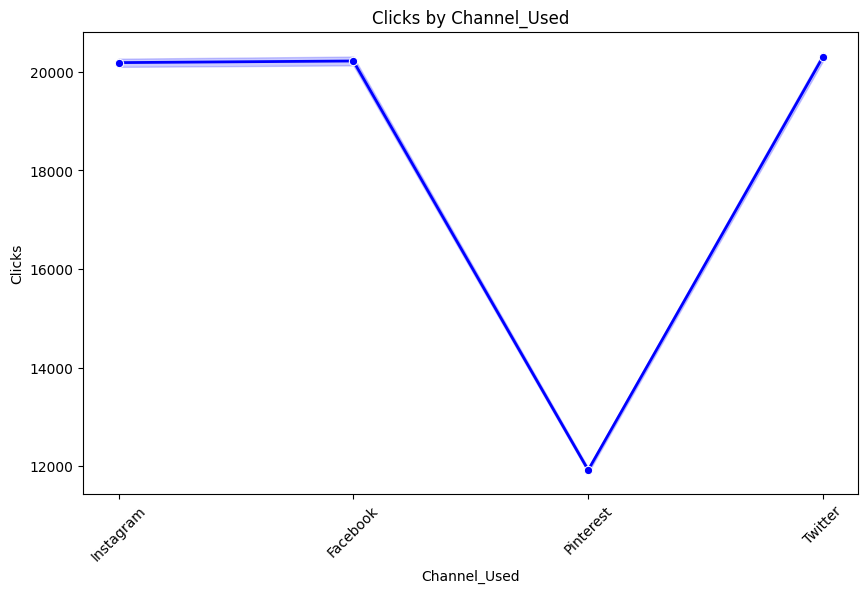

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the "0-100" age group
filtered_df = df[df['Age_Group'] != '0-100']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='Channel_Used', y='Clicks', marker='o', color='b', linewidth=2)
plt.title("Clicks by Channel_Used")
plt.xlabel("Channel_Used")
plt.ylabel("Clicks")
plt.xticks(rotation=45)
plt.show()

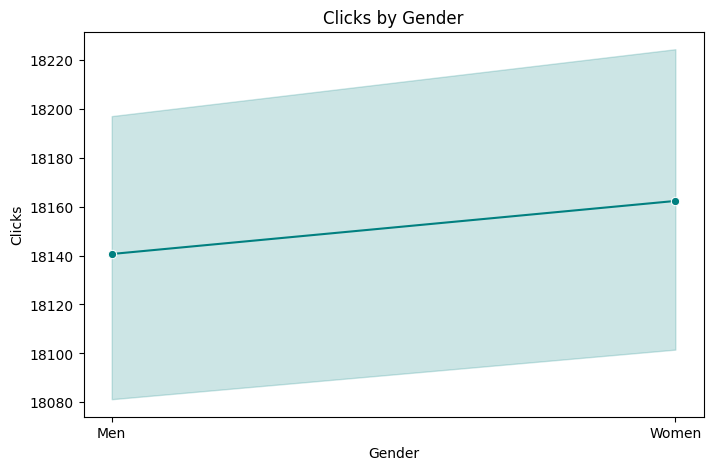

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the "All" gender
filtered_df = df[df['Gender'] != 'All']

# Create the line plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=filtered_df, x='Gender', y='Clicks', marker='o', linestyle='-', color='teal')
plt.title("Clicks by Gender")
plt.xlabel("Gender")
plt.ylabel("Clicks")
plt.show()

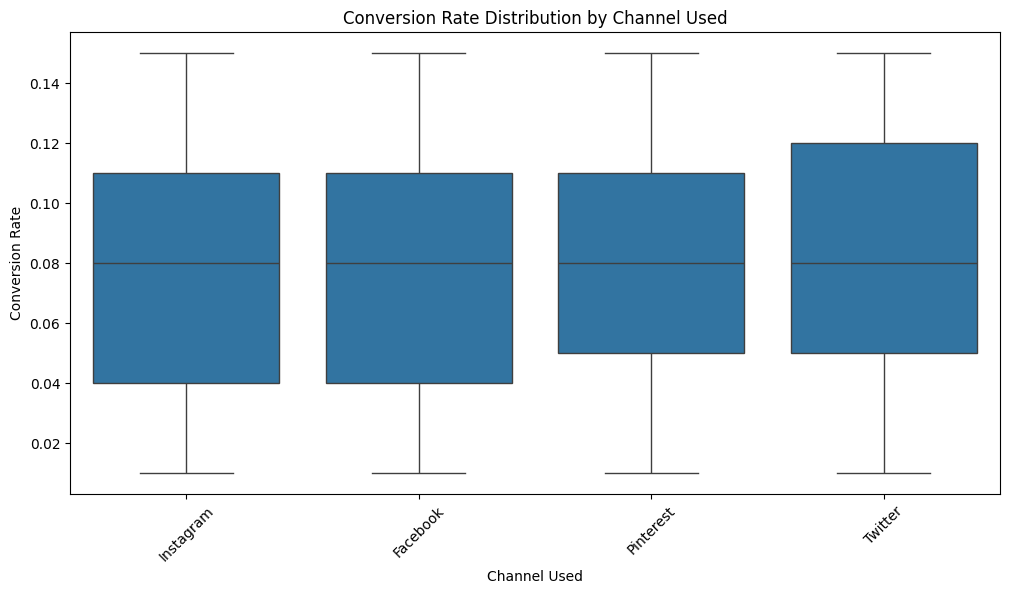

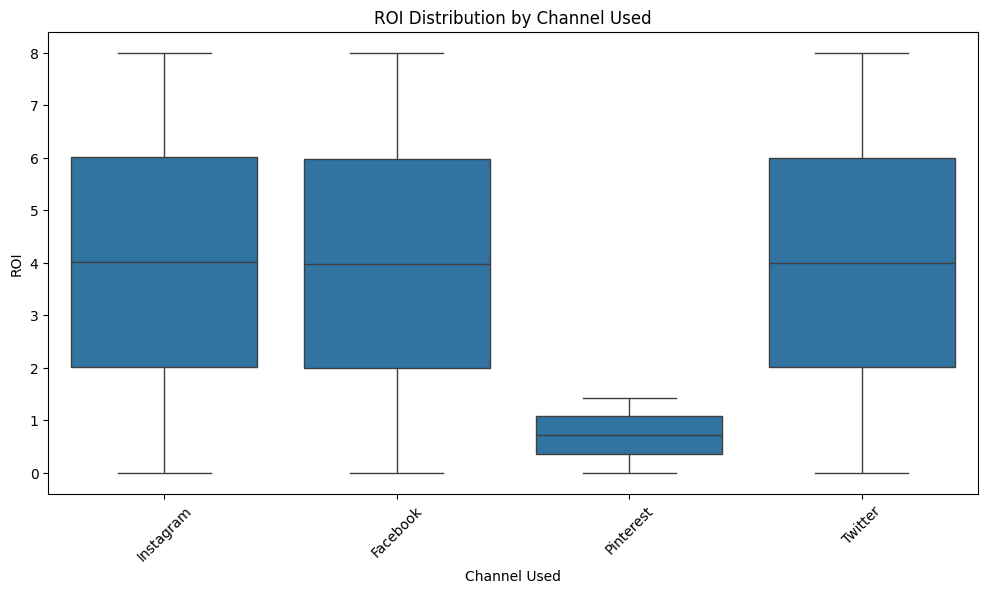

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Conversion Rate
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Channel_Used', y='Conversion_Rate')
plt.title("Conversion Rate Distribution by Channel Used")
plt.xlabel("Channel Used")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

# Plot for ROI
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Channel_Used', y='ROI')
plt.title("ROI Distribution by Channel Used")
plt.xlabel("Channel Used")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.show()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_51788\3302891821.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Channel_Used', y='ROI', ci=None)  # Removed 'ci' to simplify


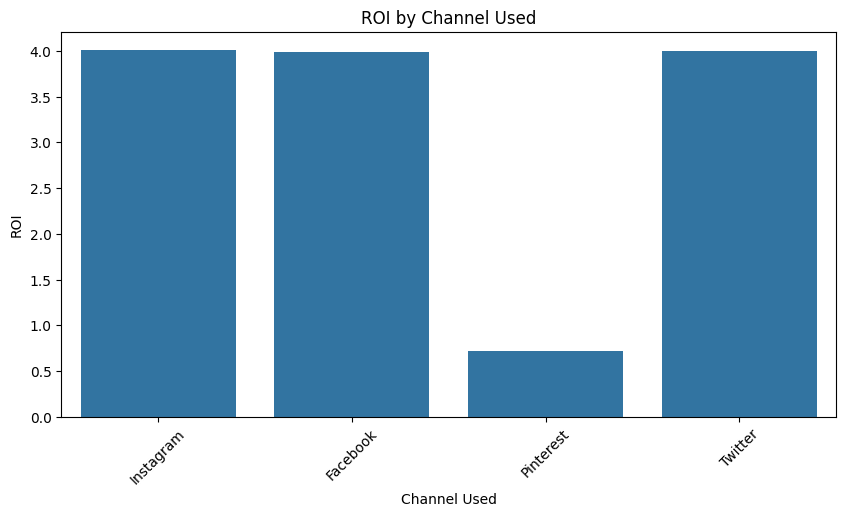

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for ROI by Channel Used
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Channel_Used', y='ROI', ci=None)  # Removed 'ci' to simplify
plt.title("ROI by Channel Used")
plt.xlabel("Channel Used")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.show()

In [115]:
# Encoding categorical variables to numerical values
df['Gender_encoded'] = df['Gender'].astype('category').cat.codes
df['Age_Group_encoded'] = df['Age_Group'].astype('category').cat.codes
df['Location_encoded'] = df['Location'].astype('category').cat.codes
df['Channel_Used_encoded'] = df['Channel_Used'].astype('category').cat.codes

import scipy.stats as stats

# One-way ANOVA for each factor (Channel_Used vs. ROI)
platform_roi = df[['Channel_Used_encoded', 'ROI']]

# Perform ANOVA to check if ROI differs across platforms
f_stat, p_value = stats.f_oneway(platform_roi[platform_roi['Channel_Used_encoded'] == 0]['ROI'],  # Instagram
                                 platform_roi[platform_roi['Channel_Used_encoded'] == 1]['ROI'],  # Facebook
                                 platform_roi[platform_roi['Channel_Used_encoded'] == 2]['ROI'])  # Pinterest

print(f"ANOVA for ROI across platforms (Instagram, Facebook, Pinterest, Twitter): F-statistic = {f_stat}, P-value = {p_value}")


ANOVA for ROI across platforms (Instagram, Facebook, Pinterest, Twitter): F-statistic = 74650.05662871808, P-value = 0.0


In [50]:
import pandas as pd
import scipy.stats as stats

# Example encoding using pandas' get_dummies for categorical variables
df_encoded = pd.get_dummies(df[['Channel_Used', 'Gender', 'Location']], drop_first=True)

# Now, we want to group by each factor and perform the ANOVA.
# For the ANOVA, we're interested in 'ROI' as the dependent variable.

# Group by 'Channel_Used', 'Gender_encoded', and 'Location_encoded'
channel_groups = [df[df['Channel_Used'] == platform] for platform in df['Channel_Used'].unique()]
gender_groups = [df[df['Gender'] == gender] for gender in df['Gender'].unique()]
location_groups = [df[df['Location'] == location] for location in df['Location'].unique()]

# Example for Channel_Used vs ROI
f_stat_channel, p_value_channel = stats.f_oneway(*[group['Conversion_Rate'] for group in channel_groups])

# Example for Gender vs ROI
f_stat_gender, p_value_gender = stats.f_oneway(*[group['Conversion_Rate'] for group in gender_groups])

# Example for Location vs ROI
f_stat_location, p_value_location = stats.f_oneway(*[group['Conversion_Rate'] for group in location_groups])

# Display the results
print(f"ANOVA for ROI across Channel_Used: F-statistic = {f_stat_channel}, P-value = {p_value_channel}")
print(f"ANOVA for ROI across Gender: F-statistic = {f_stat_gender}, P-value = {p_value_gender}")
print(f"ANOVA for ROI across Location: F-statistic = {f_stat_location}, P-value = {p_value_location}")

ANOVA for ROI across Channel_Used: F-statistic = 3.1201110408019206, P-value = 0.024866031166807617
ANOVA for ROI across Gender: F-statistic = 0.639385472214477, P-value = 0.5276172785077407
ANOVA for ROI across Location: F-statistic = 1.5029143025146143, P-value = 0.19828238587283048


In [121]:
import pandas as pd
import scipy.stats as stats

# Assuming you've already preprocessed the dataset and encoded the categorical variables
# For the sake of illustration, we will encode 'Channel_Used', 'Gender', 'Location', 'Age_Group', 'Customer_Segment', and 'Company' variables.

# Example encoding using pandas' get_dummies for categorical variables
df_encoded = pd.get_dummies(df[['Channel_Used', 'Gender', 'Location', 'Age_Group', 'Customer_Segment', 'Company']], drop_first=True)

# Now, we want to group by each factor and perform the ANOVA.
# For the ANOVA, we're interested in 'Conversion_Rate' as the dependent variable.

# Group by 'Channel_Used', 'Gender', 'Location', 'Age_Group', 'Customer_Segment', and 'Company'
channel_groups = [df[df['Channel_Used'] == platform] for platform in df['Channel_Used'].unique()]
gender_groups = [df[df['Gender'] == gender] for gender in df['Gender'].unique()]
location_groups = [df[df['Location'] == location] for location in df['Location'].unique()]
age_group_groups = [df[df['Age_Group'] == age_group] for age_group in df['Age_Group'].unique()]
customer_segment_groups = [df[df['Customer_Segment'] == segment] for segment in df['Customer_Segment'].unique()]
company_groups = [df[df['Company'] == company] for company in df['Company'].unique()]

# Perform ANOVA for each factor
# Channel_Used vs Conversion_Rate
f_stat_channel, p_value_channel = stats.f_oneway(*[group['Conversion_Rate'] for group in channel_groups])

# Gender vs Conversion_Rate
f_stat_gender, p_value_gender = stats.f_oneway(*[group['Conversion_Rate'] for group in gender_groups])

# Location vs Conversion_Rate
f_stat_location, p_value_location = stats.f_oneway(*[group['Conversion_Rate'] for group in location_groups])

# Age_Group vs Conversion_Rate
f_stat_age_group, p_value_age_group = stats.f_oneway(*[group['Conversion_Rate'] for group in age_group_groups])

# Customer_Segment vs Conversion_Rate
f_stat_customer_segment, p_value_customer_segment = stats.f_oneway(*[group['Conversion_Rate'] for group in customer_segment_groups])

# Company vs Conversion_Rate
f_stat_company, p_value_company = stats.f_oneway(*[group['Conversion_Rate'] for group in company_groups])

# Display the results
print(f"ANOVA for Conversion_Rate across Channel_Used: F-statistic = {f_stat_channel}, P-value = {p_value_channel}")
print(f"ANOVA for Conversion_Rate across Gender: F-statistic = {f_stat_gender}, P-value = {p_value_gender}")
print(f"ANOVA for Conversion_Rate across Location: F-statistic = {f_stat_location}, P-value = {p_value_location}")
print(f"ANOVA for Conversion_Rate across Age_Group: F-statistic = {f_stat_age_group}, P-value = {p_value_age_group}")
print(f"ANOVA for Conversion_Rate across Customer_Segment: F-statistic = {f_stat_customer_segment}, P-value = {p_value_customer_segment}")
print(f"ANOVA for Conversion_Rate across Company: F-statistic = {f_stat_company}, P-value = {p_value_company}")

ANOVA for Conversion_Rate across Channel_Used: F-statistic = 3.1201110408019206, P-value = 0.024866031166807617
ANOVA for Conversion_Rate across Gender: F-statistic = 0.639385472214477, P-value = 0.5276172785077407
ANOVA for Conversion_Rate across Location: F-statistic = 1.5029143025146143, P-value = 0.19828238587283048
ANOVA for Conversion_Rate across Age_Group: F-statistic = 0.667391099701109, P-value = 0.6145513820153115
ANOVA for Conversion_Rate across Customer_Segment: F-statistic = 0.23925481068045693, P-value = 0.9162414816802923
ANOVA for Conversion_Rate across Company: F-statistic = 1.213597277669993, P-value = 0.14540780544792561


In [117]:
import pandas as pd
import scipy.stats as stats

# Ensure categorical variables are encoded (you can use get_dummies for simplicity)
df_encoded = pd.get_dummies(df[['Channel_Used', 'Location', 'Customer_Segment', 'Company', 'Age_Group', 'Gender']], drop_first=True)

# Initialize lists to store F-statistics and p-values
f_stats = []
p_values = []

# Function to perform ANOVA and append the results
def perform_anova(grouped_data, factor_name):
    f_stat, p_value = stats.f_oneway(*grouped_data)
    f_stats.append(f_stat)
    p_values.append(p_value)
    return f"ANOVA for {factor_name}: F-statistic = {f_stat}, P-value = {p_value}"

# Grouping by each factor and performing ANOVA
# 1. Channel_Used
channel_groups = [df[df['Channel_Used'] == channel]['ROI'] for channel in df['Channel_Used'].unique()]
perform_anova(channel_groups, 'Channel_Used')

# 2. Location
location_groups = [df[df['Location'] == location]['ROI'] for location in df['Location'].unique()]
perform_anova(location_groups, 'Location')

# 3. Customer_Segment
customer_segment_groups = [df[df['Customer_Segment'] == segment]['ROI'] for segment in df['Customer_Segment'].unique()]
perform_anova(customer_segment_groups, 'Customer_Segment')

# 4. Company
company_groups = [df[df['Company'] == company]['ROI'] for company in df['Company'].unique()]
perform_anova(company_groups, 'Company')

# 5. Age_Group
age_group_groups = [df[df['Age_Group'] == age]['ROI'] for age in df['Age_Group'].unique()]
perform_anova(age_group_groups, 'Age_Group')

# 6. Gender
gender_groups = [df[df['Gender'] == gender]['ROI'] for gender in df['Gender'].unique()]
perform_anova(gender_groups, 'Gender')

# Create a summary table for the ANOVA results
anova_results = pd.DataFrame({
    'Factor': ['Channel_Used', 'Location', 'Customer_Segment', 'Company', 'Age_Group', 'Gender'],
    'F-statistic': f_stats,
    'P-value': p_values
})

print(anova_results)

             Factor   F-statistic   P-value
0      Channel_Used  50115.036921  0.000000
1          Location      0.596904  0.664866
2  Customer_Segment      1.421865  0.223739
3           Company      0.868805  0.729720
4         Age_Group      2.002282  0.091247
5            Gender      3.612866  0.026976


In [122]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming df is your DataFrame and 'ROI' is the dependent variable

# 1. Perform one-way ANOVA on 'Channel_Used' to test for overall significance
channel_groups = [df[df['Channel_Used'] == channel]['Engagement_Score'] for channel in df['Channel_Used'].unique()]
f_stat, p_value = stats.f_oneway(*channel_groups)

# Check if ANOVA is significant (p-value < 0.05)
if p_value < 0.05:
    print(f"ANOVA is significant: F-statistic = {f_stat}, P-value = {p_value}")
    
    # 2. Perform Tukey's HSD test for multiple comparisons if ANOVA is significant
    # Tukey's HSD requires the data to be in long format (one column for ROI, one for 'Channel_Used')
    tukey = pairwise_tukeyhsd(df['Engagement_Score'], df['Channel_Used'], alpha=0.05)
    
    # Print the Tukey's HSD test results
    print(tukey.summary())
else:
    print(f"ANOVA is not significant: F-statistic = {f_stat}, P-value = {p_value}")

ANOVA is significant: F-statistic = 61378.450187831164, P-value = 0.0
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 Facebook Instagram   0.0293 0.1022 -0.0037  0.0622  False
 Facebook Pinterest  -4.4784    0.0 -4.5113 -4.4455   True
 Facebook   Twitter   0.0174 0.5293 -0.0156  0.0504  False
Instagram Pinterest  -4.5076    0.0 -4.5406 -4.4747   True
Instagram   Twitter  -0.0119  0.791 -0.0449  0.0211  False
Pinterest   Twitter   4.4958    0.0  4.4628  4.5288   True
----------------------------------------------------------


In [1]:
import sys
!{sys.executable} -m pip install statsmodels

C:\Users\ashwi\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [112]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Ensure that categorical variables are correctly defined
df['Age_Group'] = df['Age_Group'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Customer_Segment'] = df['Customer_Segment'].astype('category')
df['Gender'] = df['Company'].astype('category')  # assuming 'Gender' should be 'Company' based on your data
df['Channel_Used'] = df['Channel_Used'].astype('category')

# Define the OLS model
model = ols('ROI ~ C(Age_Group) + C(Location) + C(Customer_Segment) + C(Gender) + C(Channel_Used)', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model)

# Display ANOVA table
print(anova_results)

                           df        sum_sq        mean_sq             F  \
C(Age_Group)              4.0  4.851470e+01      12.128676      3.005537   
C(Location)               4.0  1.453589e+01       3.633973      0.900514   
C(Customer_Segment)       4.0  3.455770e+01       8.639425      2.140886   
C(Gender)                49.0  2.355375e+02       4.806888      1.191167   
C(Channel_Used)           3.0  6.065358e+05  202178.610122  50100.716114   
Residual             299939.0  1.210387e+06       4.035444           NaN   

                       PR(>F)  
C(Age_Group)         0.017189  
C(Location)          0.462533  
C(Customer_Segment)  0.072987  
C(Gender)            0.168987  
C(Channel_Used)      0.000000  
Residual                  NaN  


In [4]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming your DataFrame is named df
# Convert relevant columns to categorical data types
df['Channel_Used'] = df['Channel_Used'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Customer_Segment'] = df['Customer_Segment'].astype('category')

# Define the OLS model with interaction terms for the specified factors
model = ols('ROI ~ C(Channel_Used) + C(Location) + C(Customer_Segment) + '
            'C(Channel_Used):C(Location) + '
            'C(Channel_Used):C(Customer_Segment) + '
            'C(Location):C(Customer_Segment)', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model)

# Display ANOVA table
print("ANOVA Table for Channel_Used, Location, and Customer_Segment with Interaction Terms:\n")
print(anova_results)

ANOVA Table for Channel_Used, Location, and Customer_Segment with Interaction Terms:

                                           df        sum_sq        mean_sq  \
C(Channel_Used)                           3.0  6.066825e+05  202227.495778   
C(Location)                               4.0  2.439586e+00       0.609896   
C(Customer_Segment)                       4.0  1.206619e+01       3.016548   
C(Channel_Used):C(Location)              12.0  3.043852e+01       2.536544   
C(Channel_Used):C(Customer_Segment)      12.0  5.011199e+01       4.175999   
C(Location):C(Customer_Segment)          16.0  2.699869e+01       1.687418   
Residual                             299948.0  1.210442e+06       4.035505   

                                                F    PR(>F)  
C(Channel_Used)                      50112.070954  0.000000  
C(Location)                              0.151133  0.962559  
C(Customer_Segment)                      0.747502  0.559500  
C(Channel_Used):C(Location)              